# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
%pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [2]:
# Import the libraries
## for reading and manipulating data
import pandas as pd
import numpy as np

# for data visualization and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# for tuning model model, getting metric scores, and splitting data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# for imputing missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# for oversampling and undersampling data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# for imputing missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# for defining maximum count of columns in a dataframe
pd.set_option("display.max_columns", None)

# for supressing scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# for suppressing scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BankChurners.csv")


### Displaying first few rows of the dataset

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

### Checking the number of rows and columns

In [5]:
df.shape

(10127, 21)

The dataset has 21 columns and 10127 rows.

## Data Overview

- Observations
- Sanity checks

### Checking data types of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Majority of the columns are numerical. Five columns are of type object.

### Checking for missing values

In [7]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- `Education_Level`  has 1519 rows missing.
- `Marital_Status` has 749 rows missing.
- We will impute these values when we split the data into train, validation and test sets.       

### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

There are no duplicate rows.

### Statistical Summary of the numerical data

In [9]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

- `CLIENTNUM` is a unique client number and can be dropped.
- 75% of the customers have 3 `Dependent_count`
- `Credit_Limit` has some large values indicating outliers.
- `Months_Inactive_12_mon` looks normally distributed and haven't contacted the bank in last 2 months.


### Categorical columns

In [10]:
df.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

Majority of the customers are:
- Females
- Married
- Graduates
and they have:
- less than $40K salary
- Blue card category

In [11]:
categorical_col = [col for col in df.columns if df[col].nunique() <= 7]
print(categorical_col)
numerical_col = [col for col in df.columns if df[col].nunique() > 7]
print(numerical_col)

['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


### Checking the target variable "Attrition Flag" to calculate the churned customers

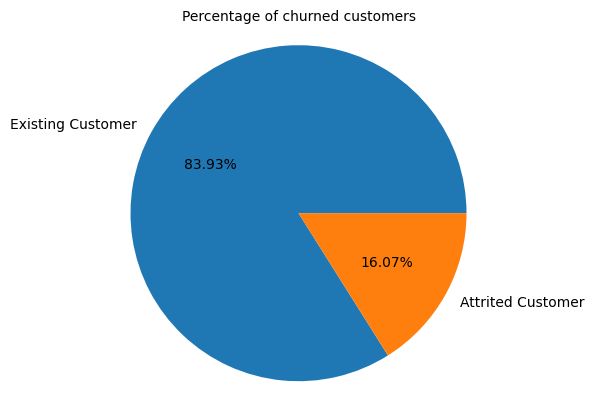

In [12]:
target = df["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target,
        labels=target.index, 
        autopct='%1.2f%%')
ax1.axis('equal')
plt.title("Percentage of churned customers", fontsize=10)
plt.show()

Based on the pie chart:
- The majority of customers remain loyal, with only 16.07% having churned.
- The data is notably skewed towards customer retention.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on Customer age

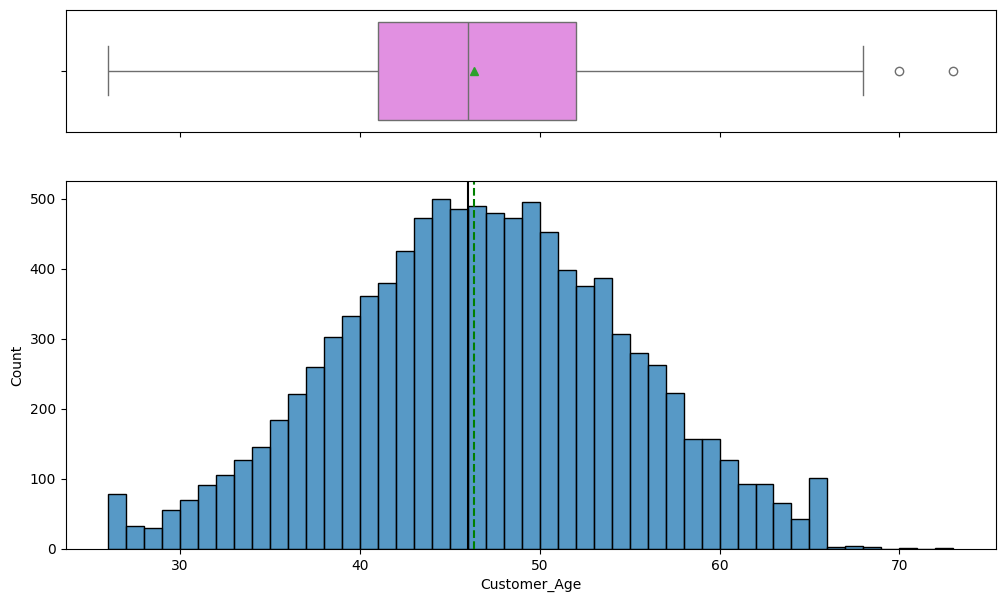

In [17]:
histogram_boxplot(df, "Customer_Age")

- The distribution of customer age is almost uniform
- The box plot shows there are outliers on the right end

#### Observations on Dependent_count

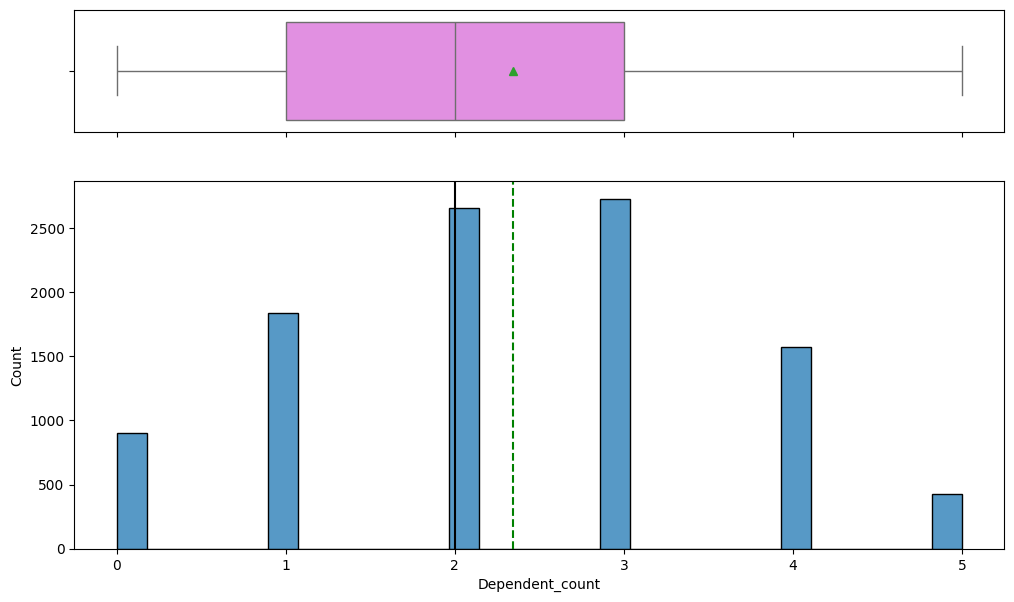

In [18]:
histogram_boxplot(df, "Dependent_count")

- The distribution of `dependant_count` is uniform
- The boxplot does not show any outliers on either side

#### Observations on Total_Relationship_Count


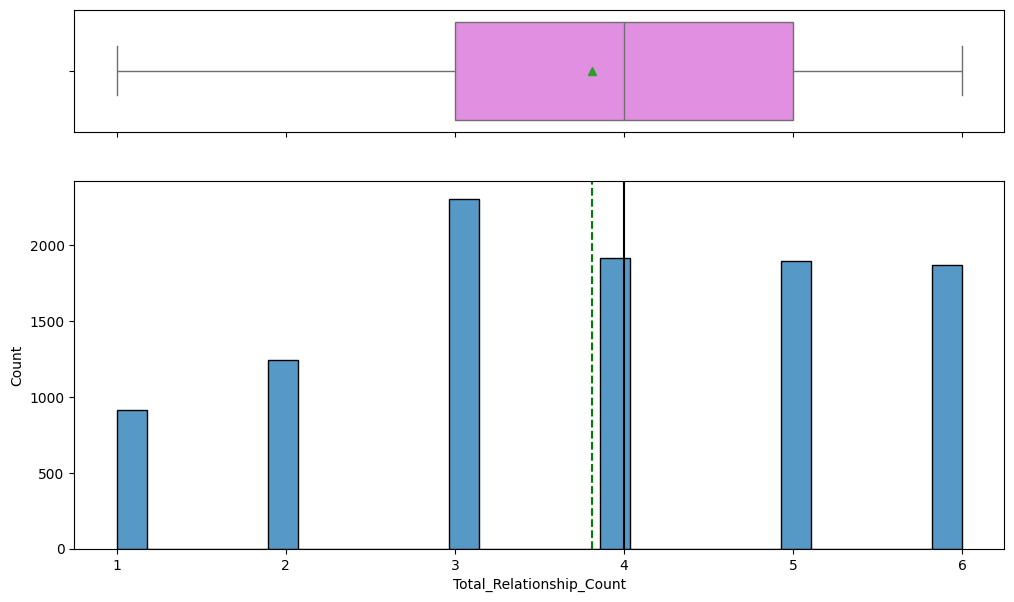

In [19]:
histogram_boxplot(df, "Total_Relationship_Count")

- The distribution of `Total_Relationship_Count` is not uniform
- The boxplot shows that there are no outliers on either side

#### Observations on Months_Inactive_12_mon

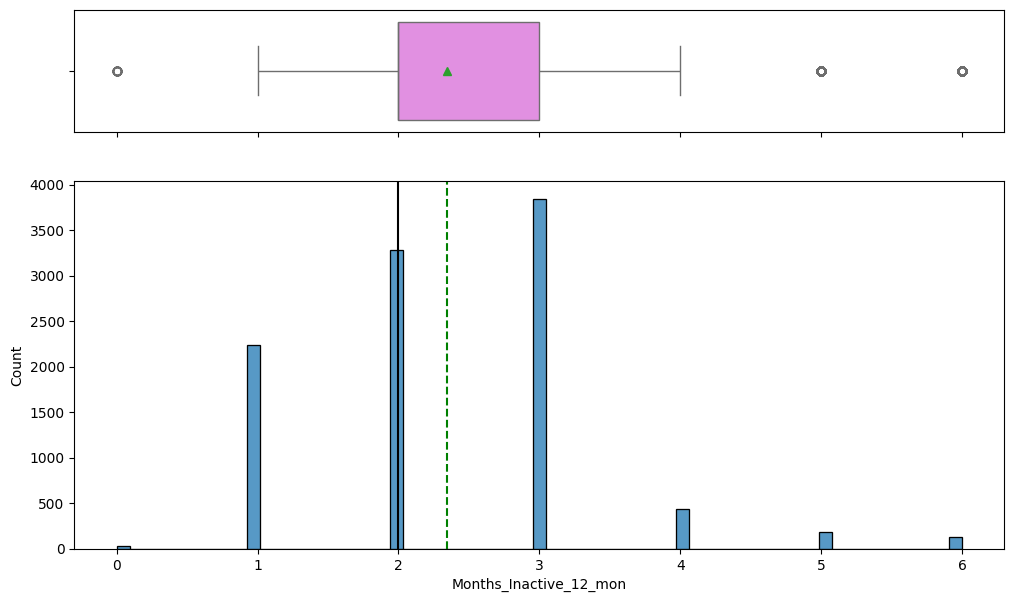

In [20]:
histogram_boxplot(df, "Months_Inactive_12_mon")

- The distribution of months inactive 12 months is not uniform
- The boxplot shows that there are outliers on both the sides
- We will not remove these outliers as they cpuld be represent the real market trend and outliers count is not high

#### Observations on Credit_Limit

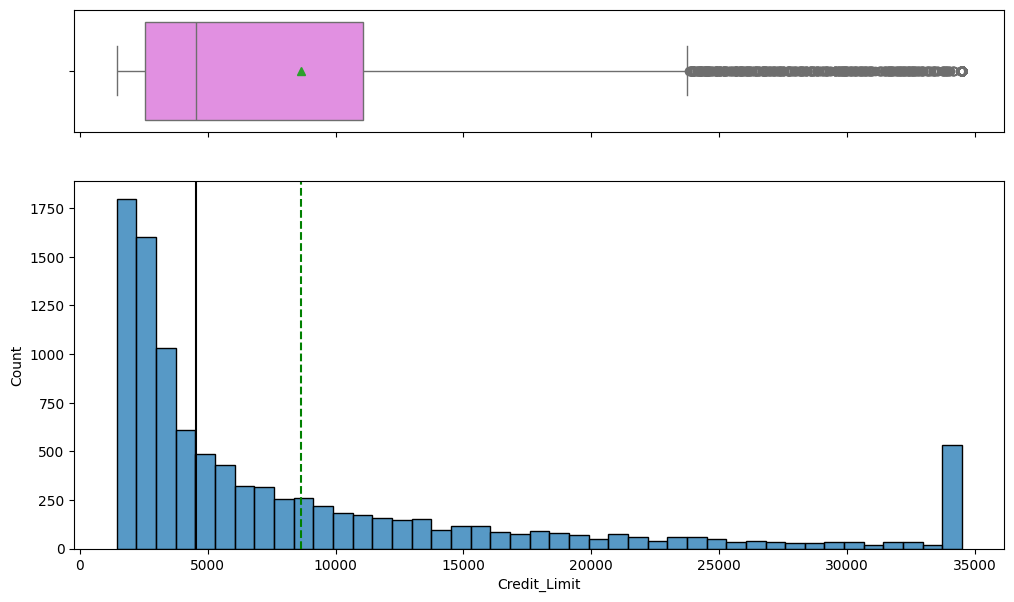

In [21]:
histogram_boxplot(df, "Credit_Limit")

- The distribution of credit limit is right skewed
- The box plot shows that there are outliers on the right end

#### Observations on Total_Revolving_Bal

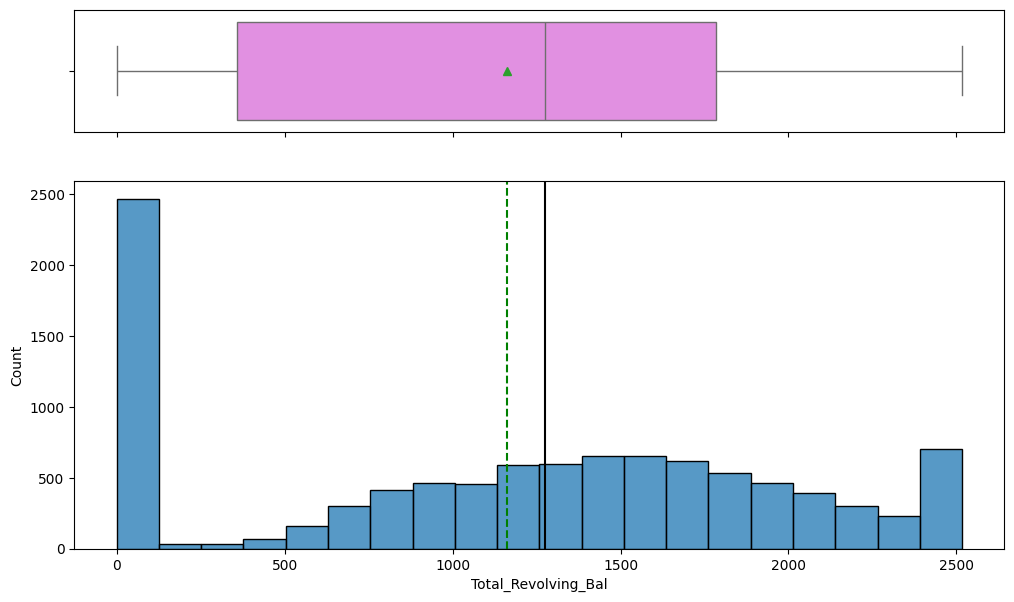

In [22]:
histogram_boxplot(df, "Total_Revolving_Bal")


- The distribution of total revolving balance is not uniform
- The boxplot shows that there are no outliers

#### Observations on Avg_Open_To_Buy


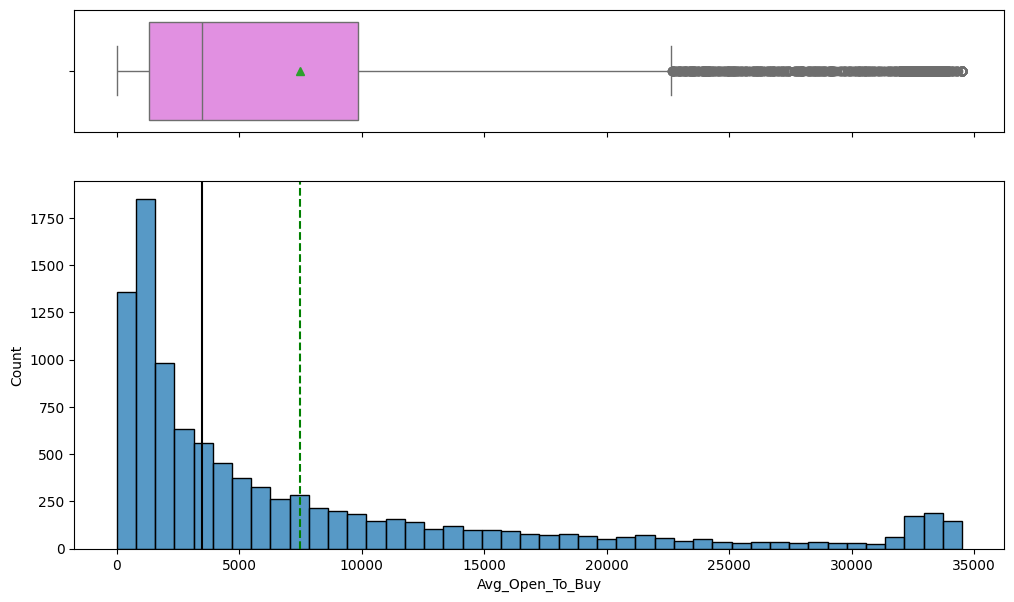

In [23]:
histogram_boxplot(df, "Avg_Open_To_Buy")

- The distribution of avg open to buy is righly skewed
- The box plot shows that there are outliers at the right end
- We will check later if want to treat these outliers

#### Observations on Total_Amt_Chng_Q4_Q1

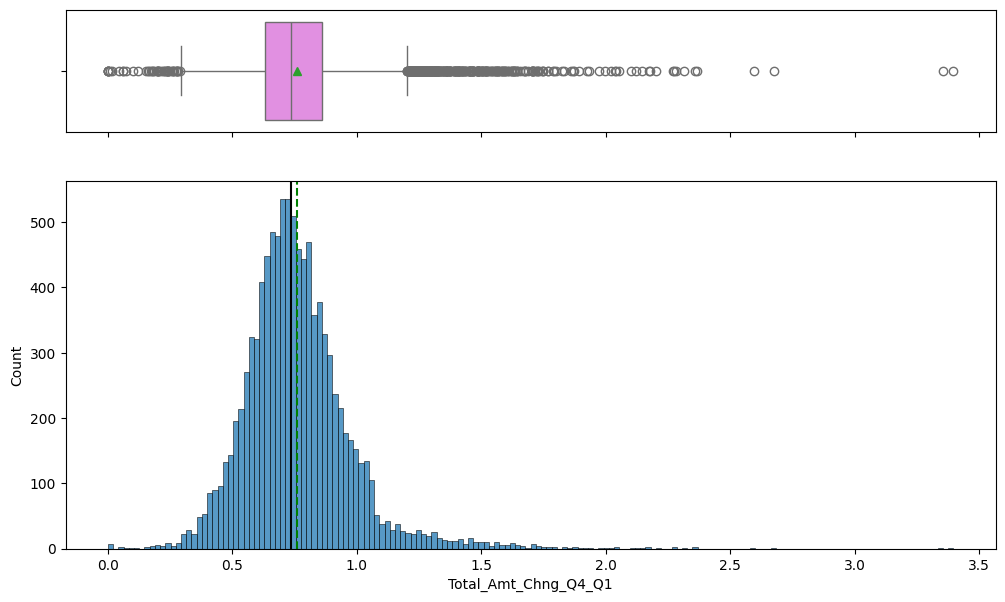

In [24]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

- The distribution of total amount change Q4-Q1 is uniform
- The box plot shows that there are outliers on both the ends
- We will see if we wan to treat these outliers

#### Observations on Total_Trans_Amt

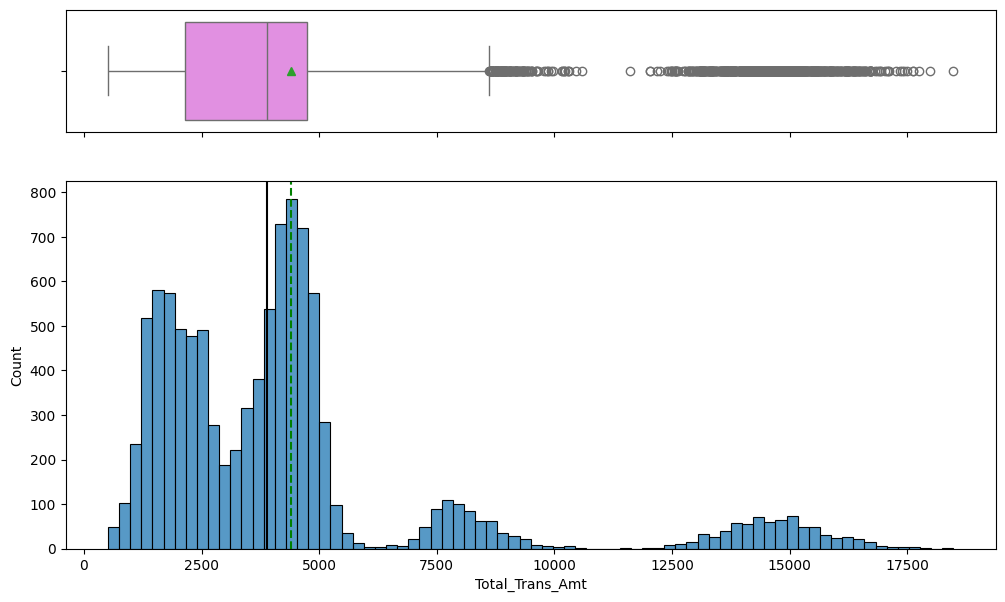

In [25]:
histogram_boxplot(df, "Total_Trans_Amt")

- The distribution of total trans amount is not uniform
- The box plot shows that there are outliers on the right end
- There are number of outliers on the right end

#### Observations on Total_Trans_Ct

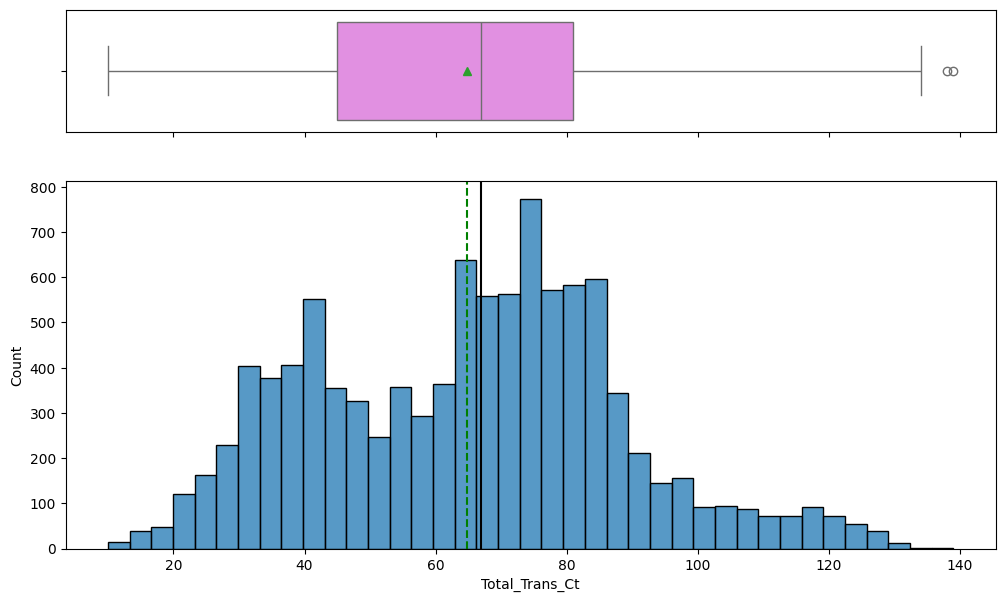

In [26]:
histogram_boxplot(df, "Total_Trans_Ct")

- The distribution of total trans count is not uniform
- The boxplot shows that there are outliers on the right end
- We will not treat these outliers as they may represent the real market trend and outlier count is few

#### Observations on Total_Ct_Chng_Q4_Q1

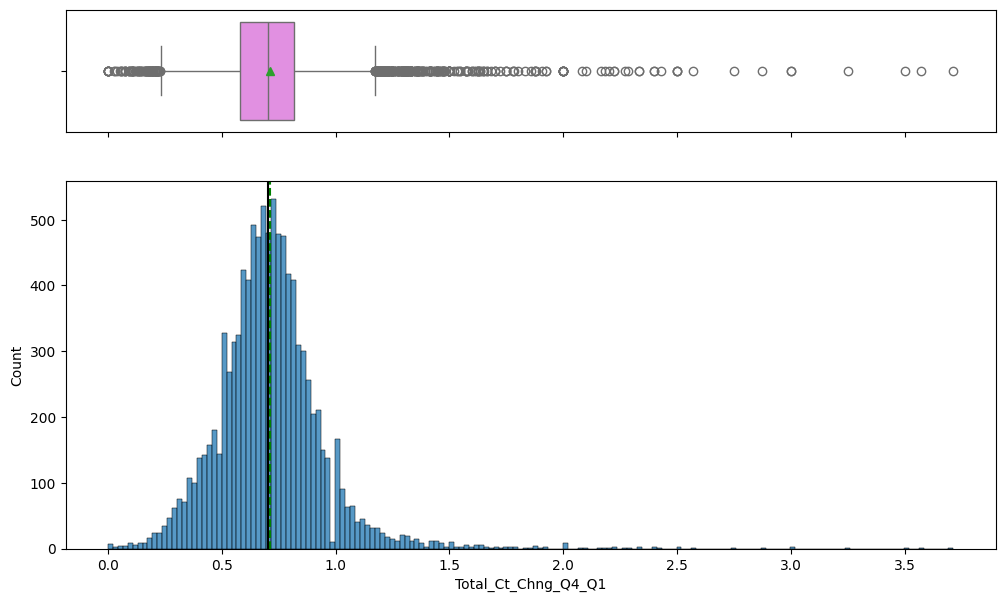

In [27]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

- The distribution of total count change Q4_Q1 is uniform
- The box plot shows that there are outliers on both the ends

#### Observations on Avg_Utilization_Ratio

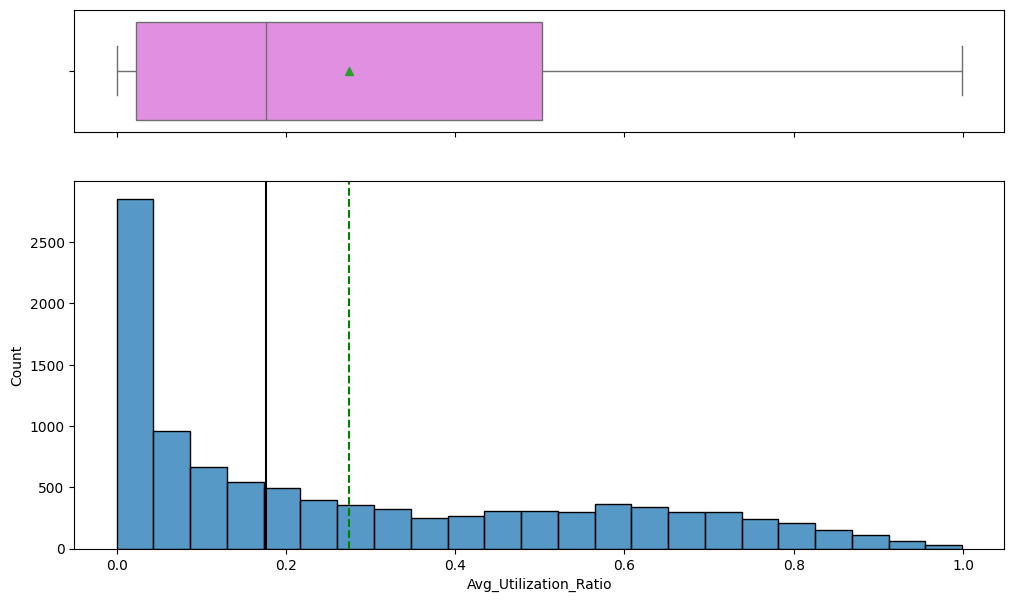

In [28]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

- The distribution of averege utilization ratio is right skewed
- The box plot shows that there are no outliers on either side

### Observations on Categorical Variables

#### Observations on Attrition Flag (target)

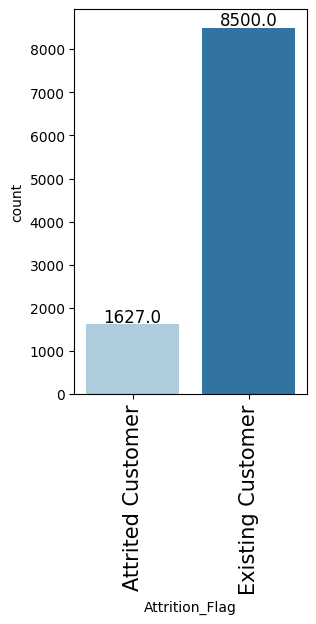

In [29]:
labeled_barplot(df, "Attrition_Flag")

We have already seen target is an imbalanced class with around 20% for attrited customers

#### Observations on Gender

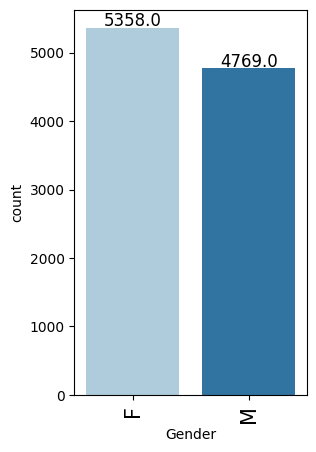

In [30]:
labeled_barplot(df, "Gender")

There is not much difference in the number of male and female customers

#### Observations on Education level

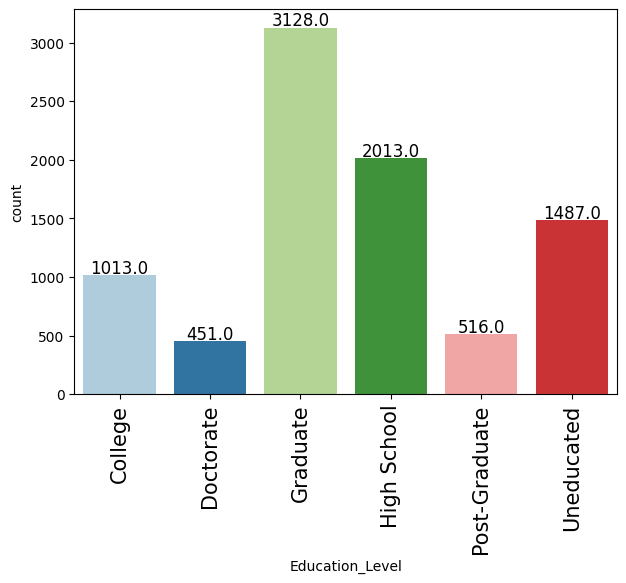

In [31]:
labeled_barplot(df, "Education_Level")

- There are high number of customers who are graduates or high school
- There are less number of customers who are post-graduate and doctorates

#### Observations on Marital_Status

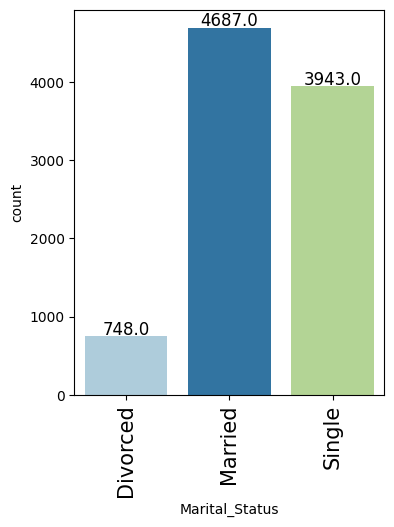

In [32]:
labeled_barplot(df, "Marital_Status")

- There are around same number of Married and Single customers
- There are very few number of divorced customers

#### Observations on Income_Category

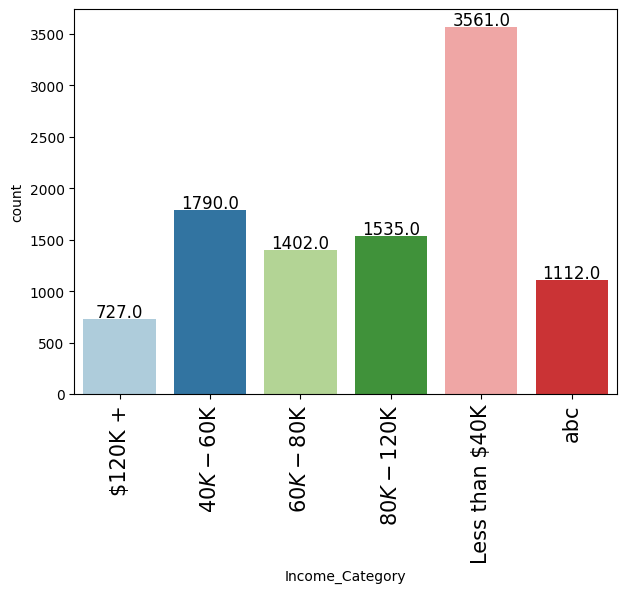

In [33]:
labeled_barplot(df, "Income_Category")

Majority of the customers have income less than $40K

#### Observations on Card_Category

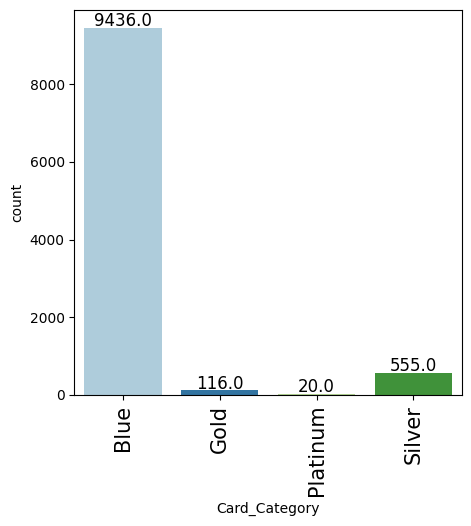

In [34]:
labeled_barplot(df, "Card_Category")

Majority of the customers have blue as a card category

### Bivariate Analysis

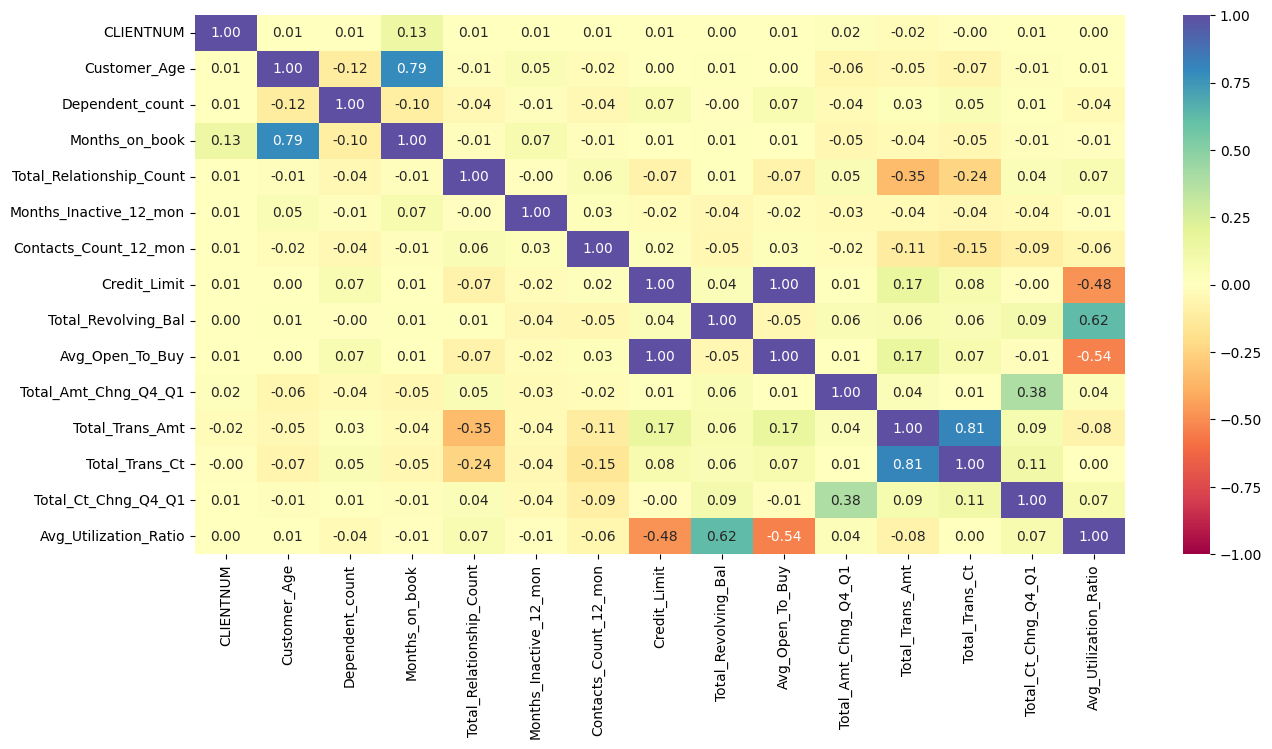

In [35]:
# Taking inspiration from MLS3
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

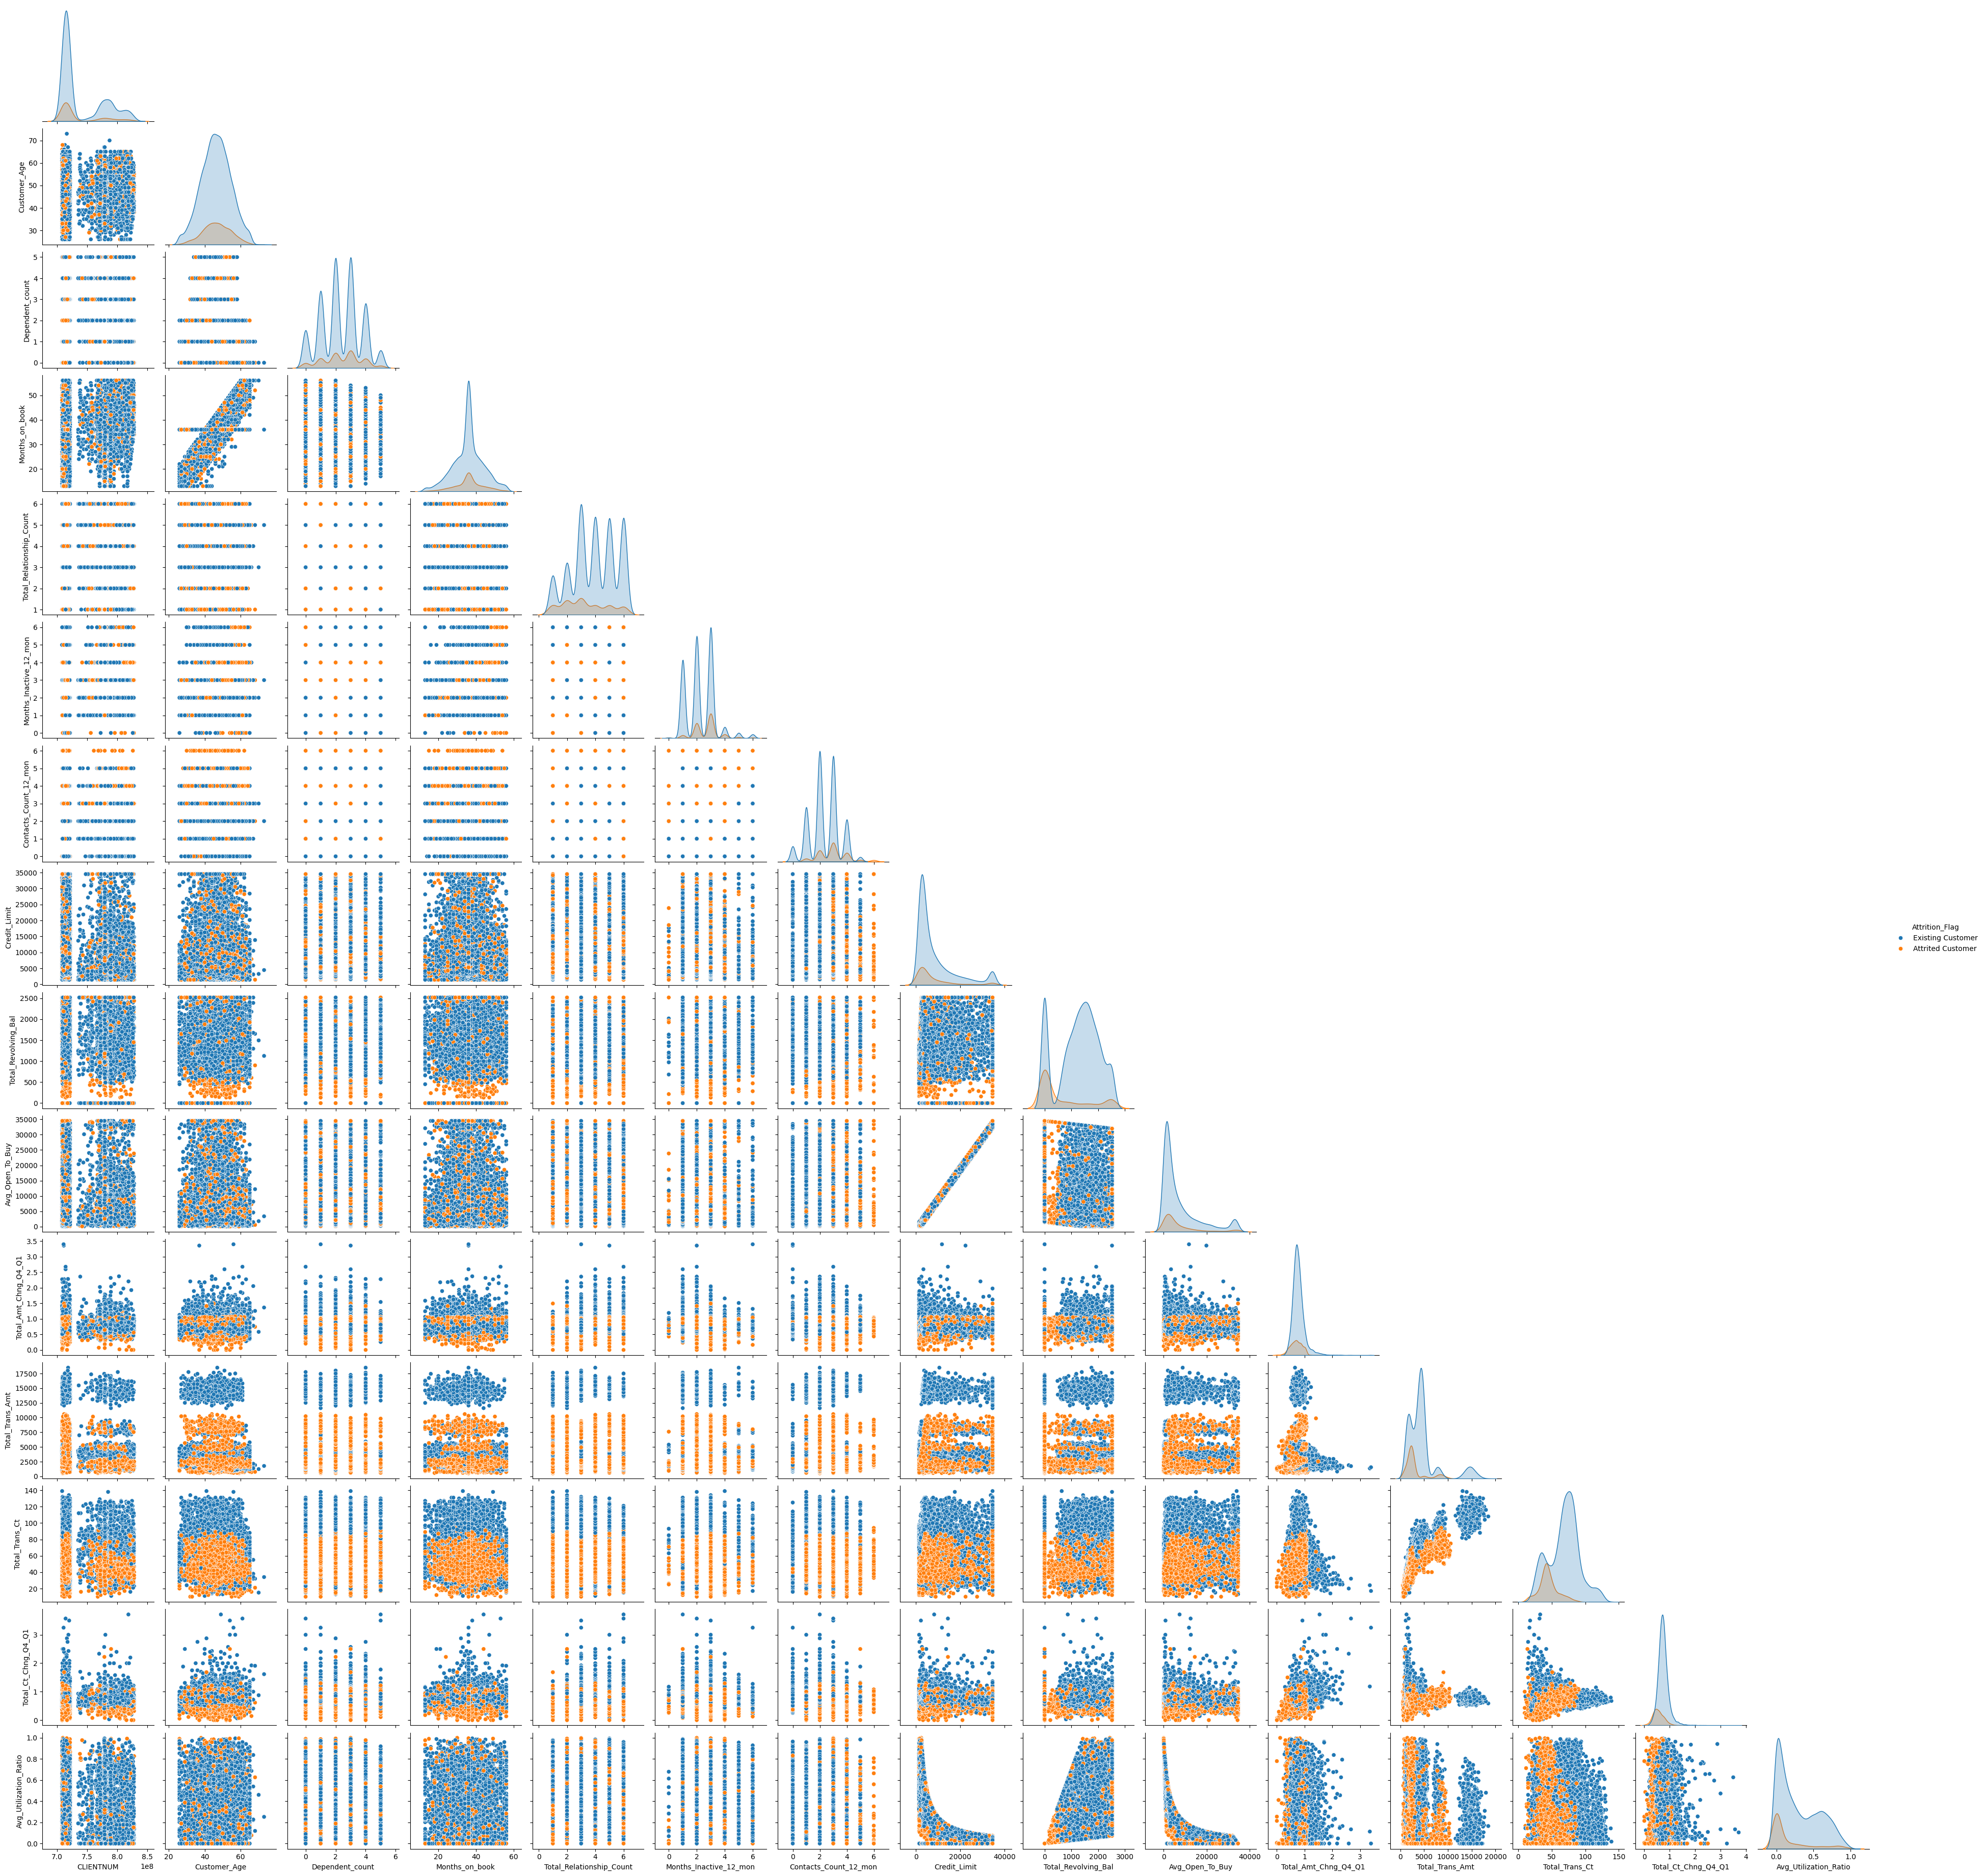

In [36]:
sns.pairplot(df, hue="Attrition_Flag", corner=True)
plt.show()

Based on the pairplot and correlation matrix:

- The age of the customer and the number of books they have are strongly correlated, indicating a potential relationship between age and reading habits.

- The credit limit and average utilization ratio have a negative correlation, implying that as the credit limit increases, the average utilization ratio tends to decrease.

- The average opening balance is negatively correlated with average utilization ratio, implying that as the average opening balance increases, the average utilization ratio tends to decrease.

- There is a positive correlation between the total revolving balance and average utilization, indicating that customers with higher average utilization tend to have higher total revolving balances.

- There is a high correlation between the total transfer amount and the total transfer count, implying that customers with more transfer transactions tend to have higher total transfer amounts.

- The credit limit and average open to buy are fully correlated, indicating a strong relationship between these two variables. We can drop one of them to avoid redundancy.

- The total transaction amount is correlated with the total amount change and the total count change, as these features may be derived from the total transaction amount. We can drop one of these columns to avoid duplication.

- These observations are based on the correlations found in the data and provide insights for further analysis and feature selection.

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

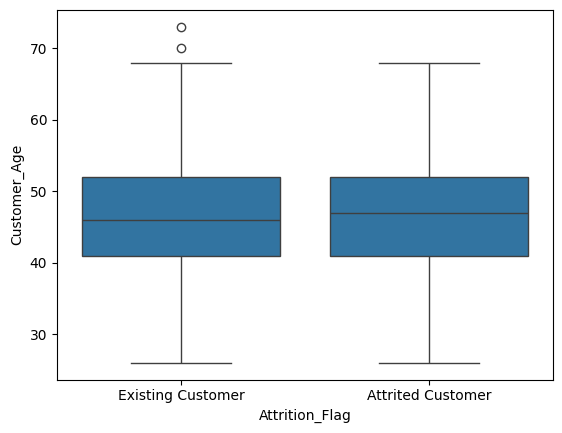

In [37]:
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=df, orient="vertical")

<Axes: xlabel='Attrition_Flag', ylabel='Dependent_count'>

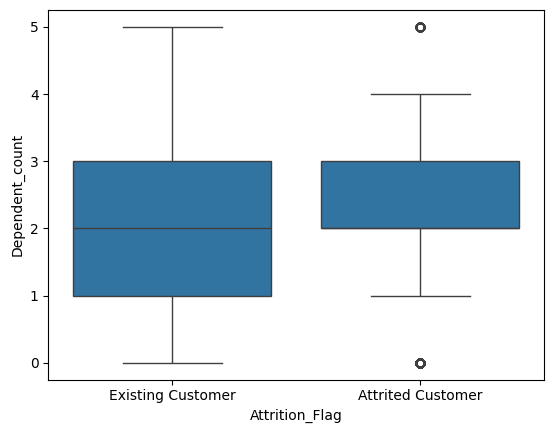

In [38]:
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=df, orient="vertical")

- We observe that amount of attrited is much concentetrated on dependants between 2 and 3.
This shows that customers with dependants between 2-3 amounts are more likely to be attrited.
- There are outliers in boxplots of attrited customer class distributions

<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

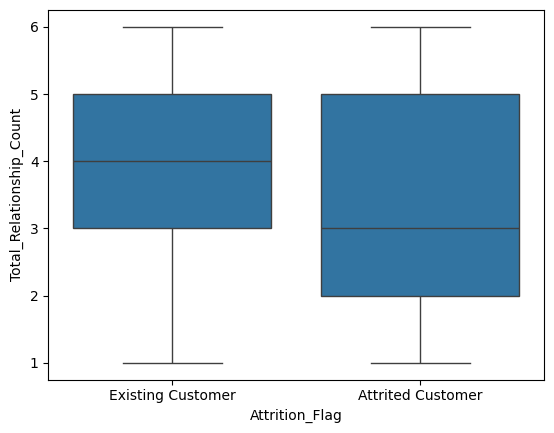

In [39]:
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=df, orient="vertical")

- The median of total relationship counts of attrited customers is less than the median of total relationship counts of existing customers. This shows that attrited customers are likely have less relationship counts.
- There are outliers in box plots of both the class

<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

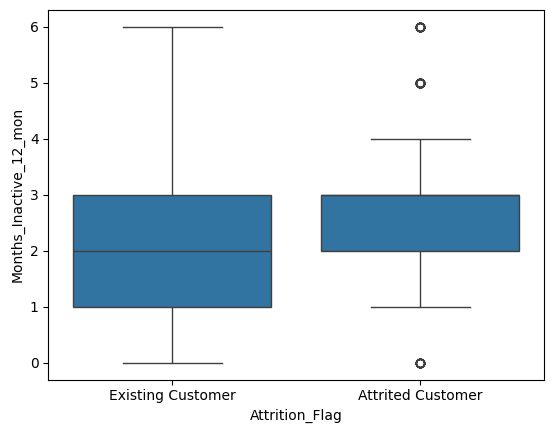

In [40]:
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=df, orient="vertical")

- The number of months inactive in last 12 months of attrited customers is higher than the existing customers. This shows that attrited customers are likely have more inactive months.
- There are outliers in boxplots of attrited customers class distributions

<Axes: xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

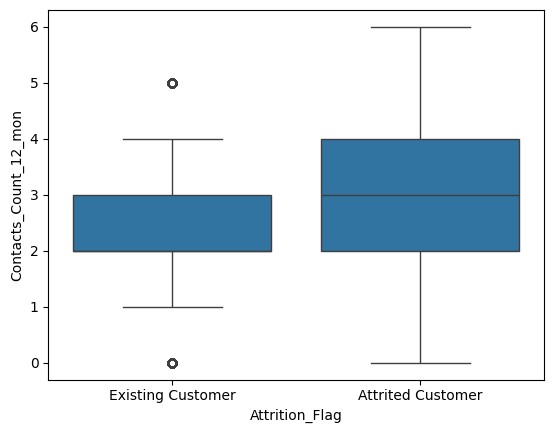

In [41]:
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=df, orient="vertical")

- The number of contacts in last 12 months of attrited customers is is higher than the existing customers. This shows that attrited customers are likely have more number of contacts.
- There are outliers in boxplots of existing customers class distributions

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

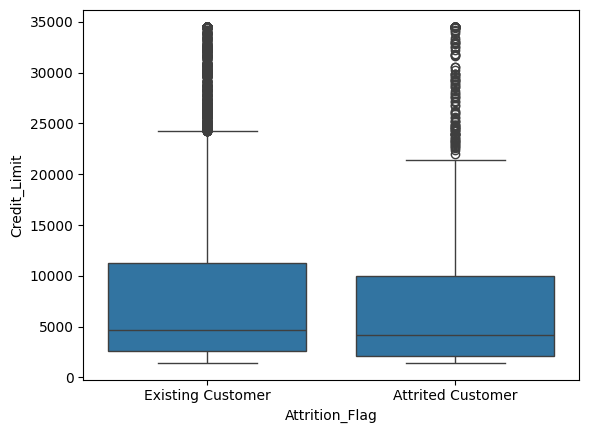

In [42]:
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=df, orient="vertical")

- The attrited customers have little lesser credit limit than existing customers based on median. This shows that attrited customers are likely have lesser credit limit.
- There are number of outliers in boxplots of both class distributions

<Axes: xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

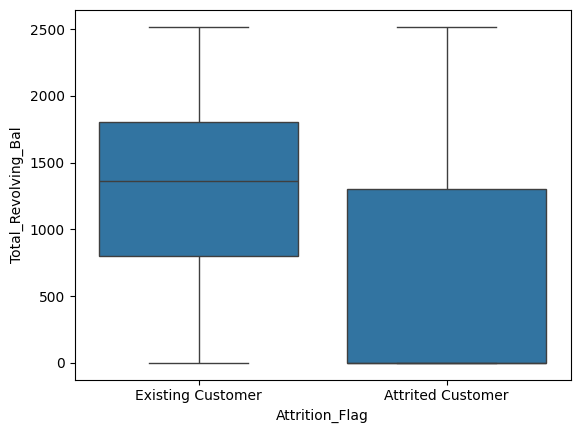

In [43]:
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df, orient="vertical")

The attrited customers have much lesser total revolving balance than existing customers based on median. This shows that attrited customers are likely have lesser total revolving balance.

In [44]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df, orient="vertical")

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

- The attrited customers have much lesser transaction amounts than existing customers based on median. This shows that attrited customers are likely have lesser transaction amounts.
- There are a number of outliers in boxplots of both class distributions

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

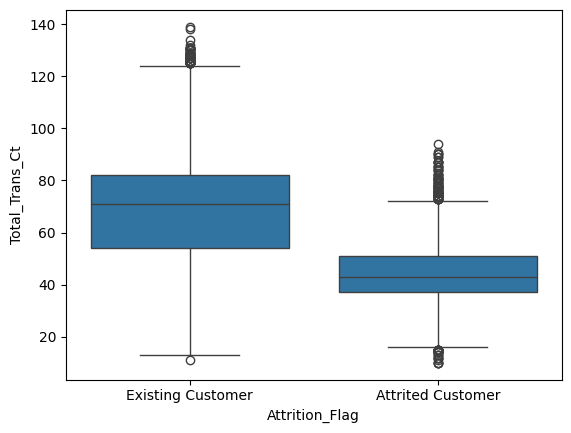

In [45]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df, orient="vertical")

- The attrited customers have much lesser transaction counts than existing customers based on median. This shows that attrited customers are likely have lesser transaction counts.
- There are outliers in boxplots of both class distributions

In [46]:
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df, orient="vertical")


<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

- The attrited customers shows less avg. utilization ratio than existing customers based on median. This shows that attrited customers are likely to spent less on available credit .
- There are outliers in boxplots of attrited customers class distributions

### Converting categorical features to "category" type

In [47]:
categorical_col = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

df[categorical_col] = df[categorical_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              10127 non-null  floa

In [48]:
df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level            8608      6           Graduate  3128
Marital_Status             9378      3            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

In [49]:
df['Agebin'] = pd.cut(df['Customer_Age'], bins = [25, 35,45,55,65, 75], labels = ['25-35', '36-45', '46-55', '56-65','66-75'])
df.Agebin.value_counts()

46-55    4135
36-45    3742
56-65    1321
25-35     919
66-75      10
Name: Agebin, dtype: int64

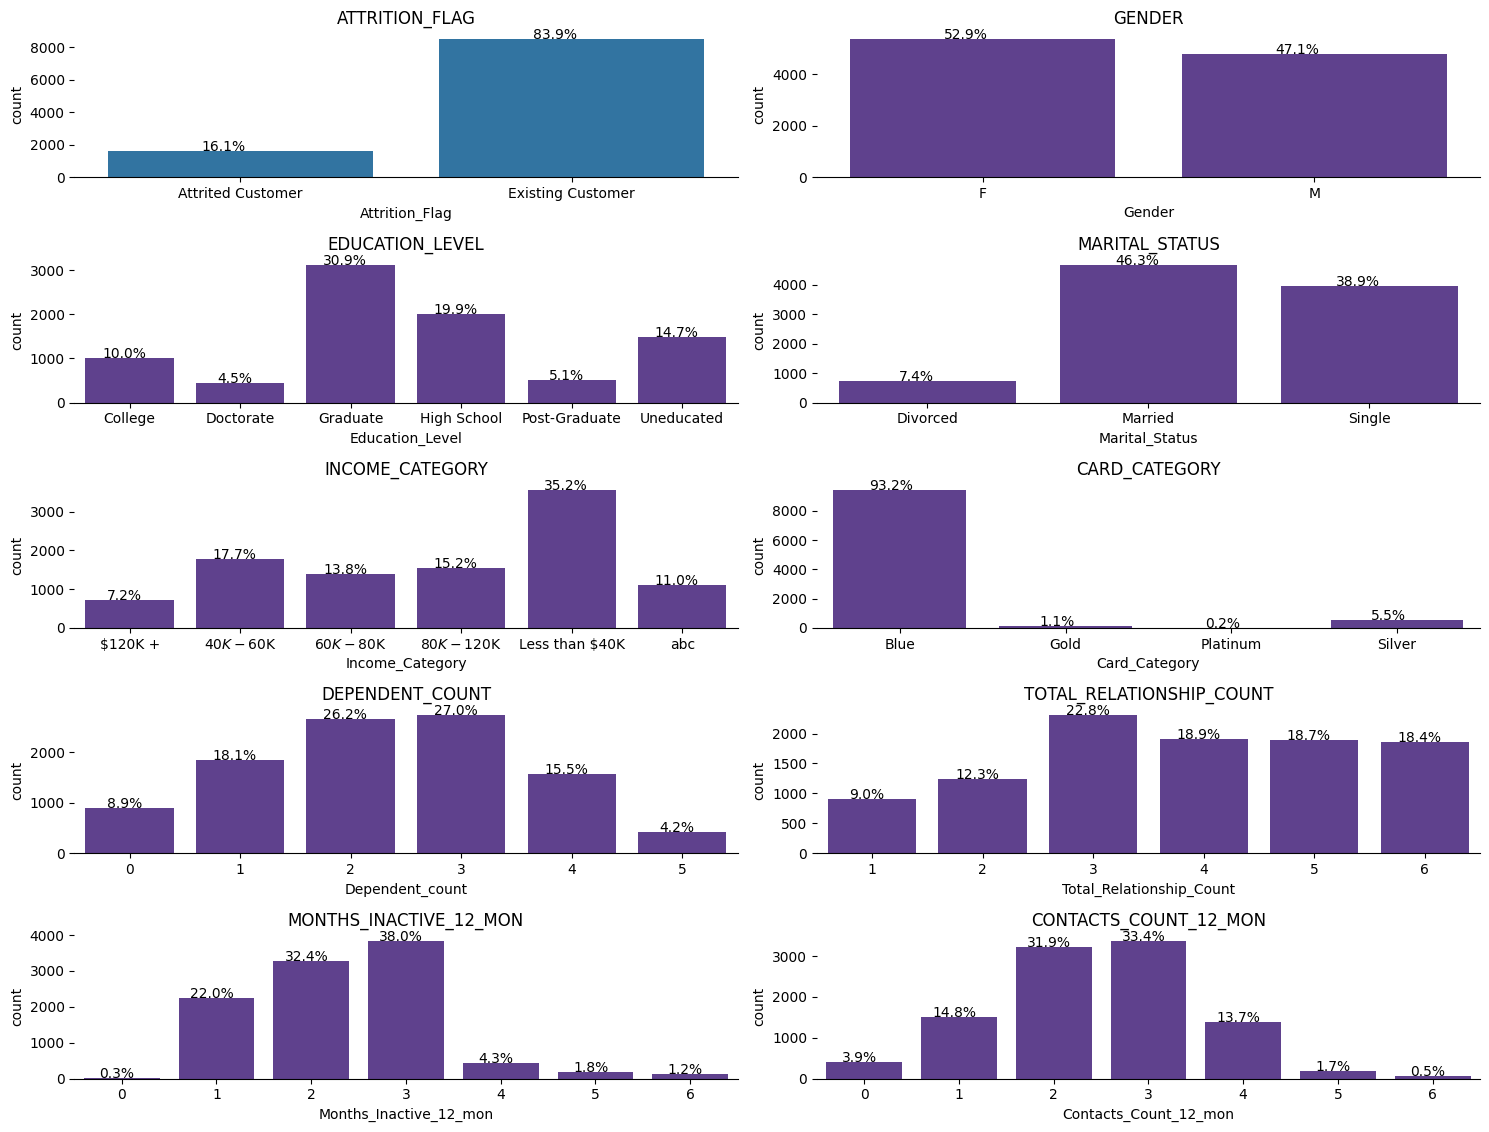

In [50]:
# Listing categorical variables

plt.figure(figsize=(15,20))
for i, variable in enumerate(categorical_col):
                     plt.subplot(9,2,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     sns.set_palette('twilight_shifted')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True)
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(categorical_col[i].upper())

- Around 16% of the customers have attrited, indicating a significant portion of customers who have discontinued their credit card services.

- Around 52% of the customers are female, highlighting the majority gender demographic among credit card holders.

- Around 30% of the customers are graduates, while the number of post-graduates and doctorate holders is relatively low, indicating a lower representation of higher educational degrees among the customer base.

- Around 46% of the customers are married. However, there is a 7.4% unknown marital status which requires imputation or further investigation.

- Around 35% of the customers earn less than 40k, indicating a significant portion of customers with lower income levels.

- Around 93% of the customers have a blue card, suggesting that the majority of customers have a standard card type. Conversely, there is a low percentage of customers with platinum cards, indicating a smaller group with premium card benefits.

- Around 22% of the customers have more than three bank products, indicating a portion of customers who utilize multiple banking services.

- Around 38% of the customers have been inactive for three months, and it would be worthwhile to investigate customers who have been inactive for four, five, or six months to determine any potential relationship with attrition.

- Around 60% of the customers were contacted 2-3 times within a 12-month period, indicating a common frequency of communication between the company and the customers.

Text(0.5, 1.0, 'Income vs credit')

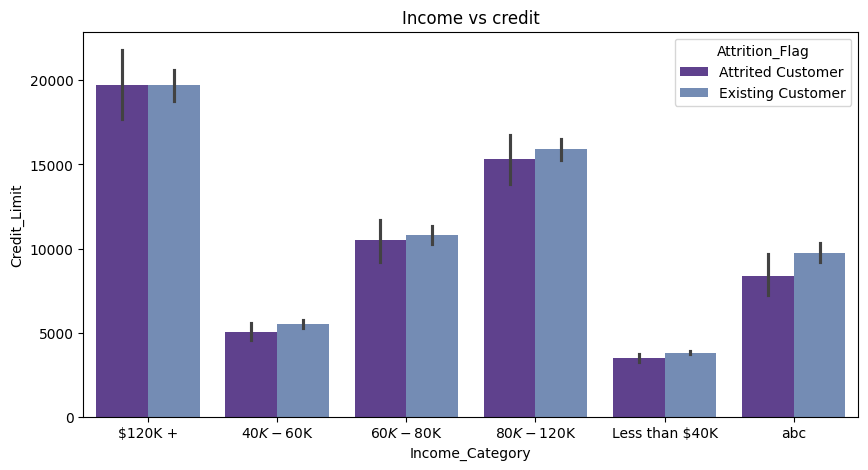

In [51]:
plt.figure(figsize=(10,5))

sns.barplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=df)
plt.title('Income vs credit')

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
All                             1627               8500  10127
Existing Customer                  0               8500   8500
------------------------------------------------------------------------------------------------------------------------


Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


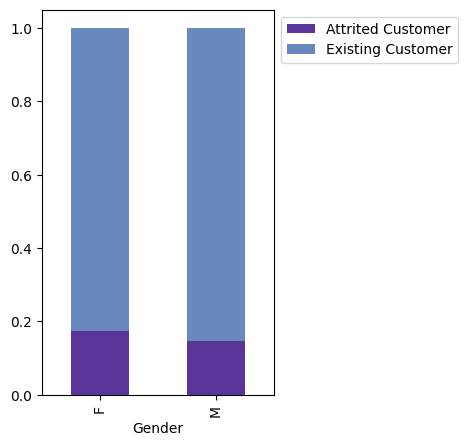

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


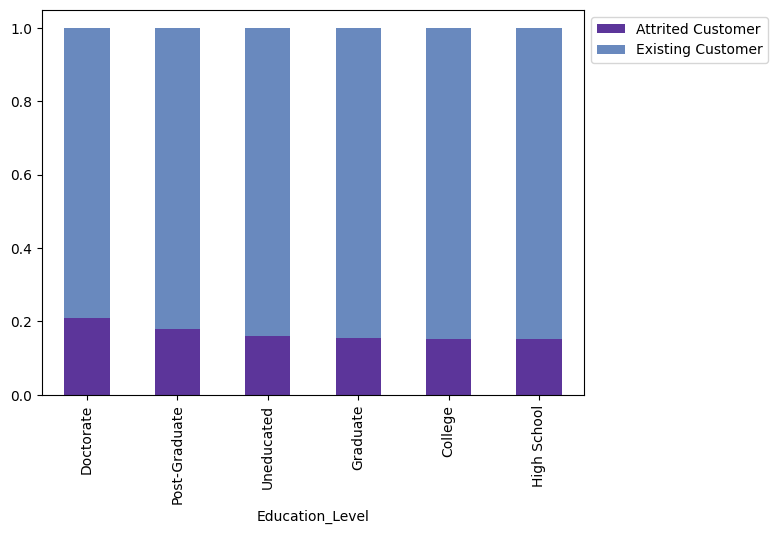

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


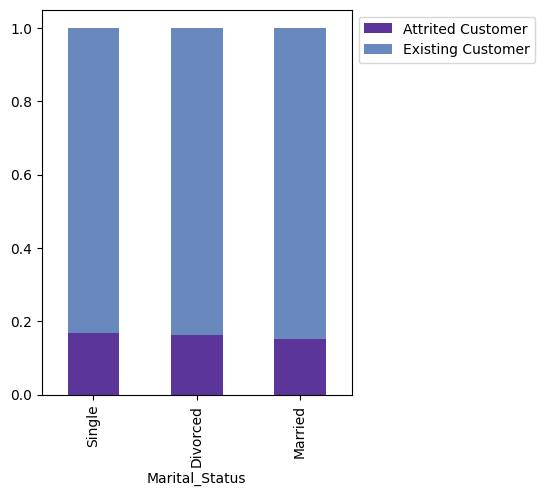

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


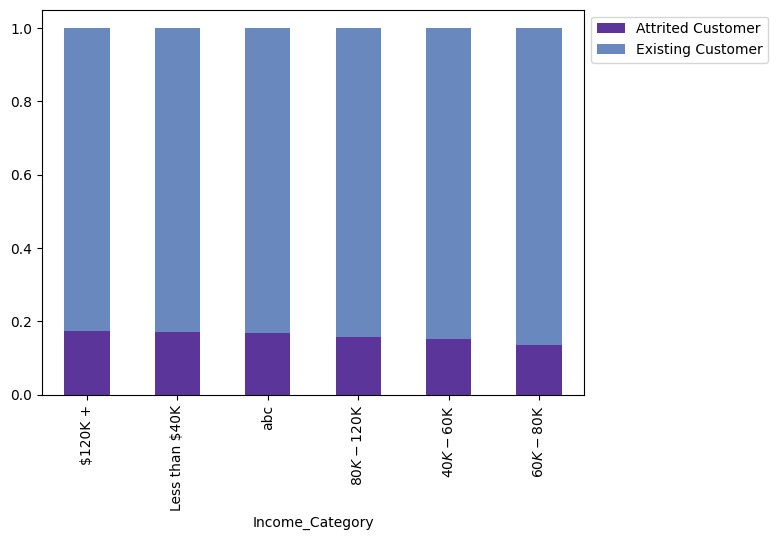

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


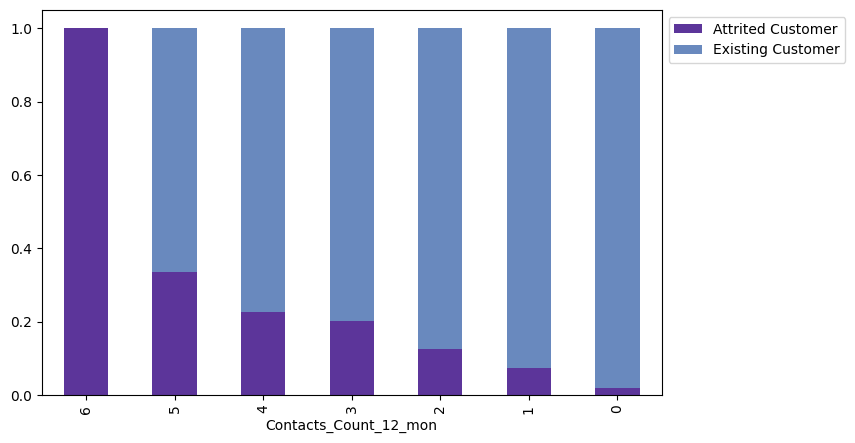

Attrition_Flag  Attrited Customer  Existing Customer    All
Agebin                                                     
All                          1627               8500  10127
46-55                         688               3447   4135
36-45                         606               3136   3742
56-65                         209               1112   1321
25-35                         122                797    919
66-75                           2                  8     10
------------------------------------------------------------------------------------------------------------------------


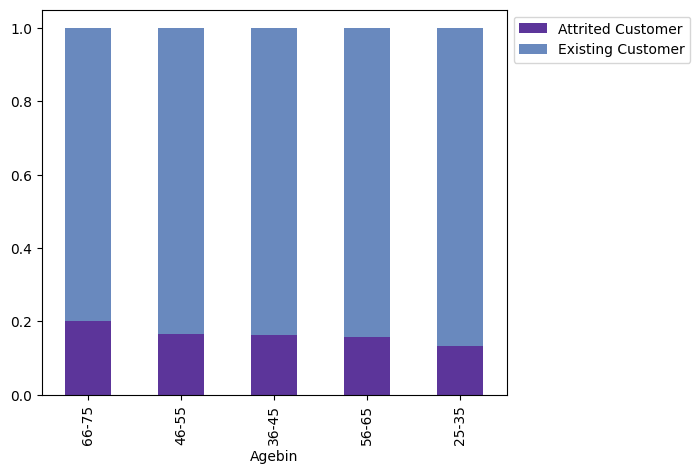

In [52]:
categorical_col.append("Agebin")
for variable in categorical_col:
    stacked_barplot(df, variable, "Attrition_Flag")

- Female customers have attrited more compared to male customers. Customers who hold doctorate or postgraduate degrees have the highest attrition rate.
- Single customers have a higher attrition rate compared to customers with other marital statuses.
- Customers with income levels above 120k and below 40k have a higher attrition rate.
- Although there are only 20 samples, customers with platinum cards have a higher attrition rate. 
- Customers with gold cards also have a higher attrition rate compared to customers with blue and silver cards. Analyzing the profiles of customers with different card types may help identify patterns.
- Customers with three dependents have a higher attrition rate.
- Customers who have only one or two bank products have a higher attrition rate compared to customers with more bank products.
- Customers who have never been inactive have the highest attrition rate. However, the sample size is small (only 29 samples). 
- Customers who were inactive for four months have the highest attrition rate, followed by three months and five months.
- It is noteworthy that customers who were contacted the most in the last 12 months have a higher attrition rate. It raises questions about whether the bank had prior information about their potential attrition, which led to increased contact. Alternatively, excessive contact from the bank may have contributed to attrition.
- Customers in the age range of 66-75 have the highest attrition rate. However, this observation is based on a small sample size of only 18 customers. Customers in the age range of 36-55 also have a higher attrition rate.

## Data Pre-processing

#### Dropping redundant variables

In [53]:
# Drop Customer ID and Agebin
df.drop(['CLIENTNUM'],axis=1,inplace=True)
df.drop(['Agebin'],axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Missing value imputation




#### Checking missing values first

In [55]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

`Education_level` and `Marital_Status` have missing values

### Replace unknown values with None

In [56]:
df = df.replace({'Unknown': None})

### Impute missing values with Simple Imputer

In [57]:
# Label encode catergorical columns

attrition = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag']= df['Attrition_Flag'].map(attrition)

marital_status = {'Married':1,'Single':2, 'Divorced':3}
df['Marital_Status']= df['Marital_Status'].map(marital_status)

education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
df['Education_Level']= df['Education_Level'].map(education)

income = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
df['Income_Category']= df['Income_Category'].map(income)

In [58]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

# Create an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the target variable
y = imputer.fit_transform(df[['Attrition_Flag']])

# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
columns_to_impute = ['Income_Category','Education_Level','Marital_Status']

# Fit and transform the imputer on train data
X[columns_to_impute] = imp_mode.fit_transform(X[columns_to_impute])

In [59]:
# Splitting data into training, validation and test set
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [60]:
# Creating dummy variables for categorical variables

X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [62]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    df_perf_training = model_performance_classification_sklearn(model, X_train, y_train)
    print(f"---------- {name}----------")
    print(df_perf_training)

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    df_perf_validation = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"---------- {name}----------")
    print(df_perf_validation)


Training Performance:

***** Bagging*****
   Accuracy  Recall  Precision    F1
0     0.997   0.985      0.997 0.991
***** Random forest*****
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
***** Decision Tree*****
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
***** AdaBoost*****
   Accuracy  Recall  Precision    F1
0     0.958   0.840      0.892 0.865
***** Gradient Boosting*****
   Accuracy  Recall  Precision    F1
0     0.974   0.878      0.954 0.915


***** XBoost*****
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance:

---------- Bagging----------
   Accuracy  Recall  Precision    F1
0     0.952   0.794      0.896 0.842
---------- Random forest----------
   Accuracy  Recall  Precision    F1
0     0.949   0.748      0.921 0.826
---------- Decision Tree----------
   Accuracy  Recall  Precision    F1
0     0.936   0.794      0.804 0.799
---------- AdaBoost----------
   Accuracy  Recall  Precision    F1
0     0.956   0.822      0.893 0.856
---------- Gradient Boosting----------
   Accuracy  Recall  Precision    F1
0     0.964   0.825      0.947 0.882
---------- XBoost----------
   Accuracy  Recall  Precision    F1
0     0.974   0.899      0.936 0.917


#### Performance of the models with original data on the training set:
- The training performance of the models were excellent. 
- Bagging, Decision Tree, and XGBoost achieved perfect accuracy, recall, precision, and F1 scores of 1.000. 
- Random Forest and AdaBoost also achieved high scores, with accuracy and recall both at 1.000, and precision and F1 scores above 0.890. 
- Gradient Boosting had an accuracy of 0.974, recall of 0.878, precision of 0.954, and F1 score of 0.915.

#### Performance of the models with original data on the validation set:

- On the validation set, the performance of the models remained strong. Bagging achieved an accuracy of 0.952, recall of 0.794, precision of 0.896, and F1 score of 0.842. 
- Decision Tree had an accuracy of 0.936, recall of 0.794, precision of 0.804, and F1 score of 0.799. Random Forest achieved an accuracy of 0.949, recall of 0.748, precision of 0.921, and F1 score of 0.826. 
- AdaBoost had an accuracy of 0.956, recall of 0.822, precision of 0.893, and F1 score of 0.856. Gradient Boosting achieved an accuracy of 0.964, recall of 0.825, precision of 0.947, and F1 score of 0.882. 
- XGBoost had the highest accuracy of 0.974, recall of 0.899, precision of 0.936, and F1 score of 0.917.

### Model Building with Oversampled data


In [63]:
# Synthetic Minority Over Sampling Technique
# Again taking inspiration from MLS3
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': [976]
Before Oversampling, counts of label 'No': [5099] 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 39)
After Oversampling, the shape of train_y: (10198,) 



In [64]:
print("\n" "Training Performance After OverSampling:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    df_perf_training = model_performance_classification_sklearn(model, X_train_over, y_train_over)
    print(f"---------- {name} ----------")
    print(df_perf_training)

print("\n" "Validation Performance After Oversampling:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    df_perf_validation = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"---------- {name} ----------")
    print(df_perf_validation)


Training Performance After OverSampling:



---------- Bagging ----------
   Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.998
---------- Random forest ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
---------- Decision Tree ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
---------- AdaBoost ----------
   Accuracy  Recall  Precision    F1
0     0.967   0.968      0.967 0.967
---------- Gradient Boosting ----------
   Accuracy  Recall  Precision    F1
0     0.981   0.981      0.981 0.981
---------- XBoost ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance After Oversampling:

---------- Bagging ----------
   Accuracy  Recall  Precision    F1
0     0.944   0.837      0.817 0.827
---------- Random forest ----------
   Accuracy  Recall  Precision    F1
0     0.952   0.825      0.868 0.846
---------- Decision Tree ----------
   Accuracy  Recall  Precision    F1
0     0.924   0.782   

After implementing oversampling techniques on our training data, we retrained the models and assessed their performance on both the training and validation sets.

For the training set, Bagging, Decision Tree, and Random Forest delivered excellent results, achieving a perfect score of 1.000 across accuracy, recall, precision, and F1 metrics, showing their capability in detecting customer attrition. AdaBoost showed commendable results with an accuracy of 0.949, recall of 0.856, precision of 0.831, and an F1 score of 0.843. Similarly, Gradient Boosting achieved a robust accuracy of 0.971, recall of 0.916, precision of 0.904, and an F1 score of 0.910. XGBoost, like the other top performers, also reached scores of 1.000 across all evaluation metrics.

When evaluated on the validation set, these models continued to exhibit strong performance. Bagging recorded an accuracy of 0.944, with recall at 0.837, precision at 0.817, and an F1 score of 0.827. The Decision Tree model attained an accuracy of 0.924, recall of 0.782, precision of 0.757, and an F1 score of 0.769. Random Forest achieved 0.952 in accuracy, 0.825 in recall, 0.868 in precision, and an F1 score of 0.846. AdaBoost remained competitive with an accuracy of 0.950, recall of 0.874, precision of 0.824, and an F1 score of 0.848. Gradient Boosting achieved an accuracy of 0.962, recall of 0.902, precision of 0.865, and an F1 score of 0.883. XGBoost led the pack with the highest validation set accuracy of 0.970, recall of 0.893, precision of 0.918, and an F1 score of 0.905.

These findings highlight the models' consistency and strength in accurately identifying cases of customer attrition, even after the data was oversampled.



### Model Building with Undersampled data

In [65]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [67]:
rus = RandomUnderSampler(random_state = 1) # Undersample dependent variable
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
#Undersample to balance classes
print("Before Undersampling, counts of label 'Attrited': {}".format(sum(y_train==1)))
print("Before Undersampling, counts of label 'Existing': {} \n".format(sum(y_train==0)))

print("After Undersampling, counts of label 'Attrited': {}".format(sum(y_train_under==1)))
print("After Undersampling, counts of label 'Existing': {} \n".format(sum(y_train_under==0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Undersampling, counts of label 'Attrited': [976]
Before Undersampling, counts of label 'Existing': [5099] 

After Undersampling, counts of label 'Attrited': 976
After Undersampling, counts of label 'Existing': 976 

After Undersampling, the shape of train_X: (1952, 39)
After Undersampling, the shape of train_y: (1952,) 



In [69]:
print("\n" "Training Performance After Undersampling:" "\n")
for name, model in models:
    model.fit(X_train_under, y_train_under)
    df_training_under = model_performance_classification_sklearn(model, X_train_under, y_train_under)
    print(f"---------- {name} ----------")
    print(df_training_under)

print("\n" "Validation Performance After Undersampling:" "\n")
for name, model in models:
    model.fit(X_train_under, y_train_under)
    df_validation_under = model_performance_classification_sklearn(model, X_val, y_val)
    print(f"---------- {name} ----------")
    print(df_validation_under)


Training Performance After Undersampling:

---------- Bagging ----------
   Accuracy  Recall  Precision    F1
0     0.995   0.990      1.000 0.995
---------- Random forest ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
---------- Decision Tree ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
---------- AdaBoost ----------
   Accuracy  Recall  Precision    F1
0     0.945   0.950      0.941 0.945
---------- Gradient Boosting ----------
   Accuracy  Recall  Precision    F1
0     0.969   0.976      0.962 0.969
---------- XBoost ----------
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance After Undersampling:

---------- Bagging ----------
   Accuracy  Recall  Precision    F1
0     0.919   0.908      0.687 0.782
---------- Random forest ----------
   Accuracy  Recall  Precision    F1
0     0.929   0.933      0.714 0.809
---------- Decision Tree ----------
   Accuracy  R

After we adjusted the training data by undersampling, we retrained and tested our models on both the training and validation sets.

Training Set Performance:
- **Bagging**: Accuracy was 0.942, recall was 0.990, precision was 0.739, and the F1 score was 0.846.
- **Decision Tree**: Achieved 0.916 in accuracy, a perfect recall of 1.000, precision of 0.656, and an F1 score of 0.793.
- **Random Forest**: Had 0.942 accuracy, a recall of 1.000, precision of 0.735, and an F1 score of 0.847.
- **AdaBoost**: Reached an accuracy of 0.929, recall of 0.950, precision of 0.708, and an F1 score of 0.811.
- **Gradient Boosting**: Scored 0.939 in accuracy, 0.976 in recall, 0.734 in precision, and an F1 score of 0.838.
- **XGBoost**: Excelled with 0.958 accuracy, a recall of 1.000, precision of 0.791, and an F1 score of 0.883.

Validation Set Performance:
- **Bagging**: Accuracy was 0.919, recall was 0.908, precision was 0.687, and the F1 score was 0.782.
- **Decision Tree**: Had 0.882 accuracy, 0.887 recall, 0.587 precision, and an F1 score of 0.707.
- **Random Forest**: Achieved 0.929 accuracy, 0.933 recall, 0.714 precision, and an F1 score of 0.809.
- **AdaBoost**: Showed 0.923 accuracy, 0.948 recall, 0.691 precision, and an F1 score of 0.799.
- **Gradient Boosting**: Performed with 0.933 accuracy, 0.948 recall, 0.724 precision, and an F1 score of 0.821.
- **XGBoost**: Scored 0.938 in accuracy, 0.957 in recall, 0.736 in precision, and an F1 score of 0.832.

Overall, using undersampling reduced the precision and F1 scores, although the accuracy and recall remained relatively high. This suggests the models could still identify most cases, but their ability to be precise in identifying those cases was somewhat compromised compared to earlier results.

### HyperparameterTuning

Based on the recall value of above models , we can choose the top 3 models for further hyperparameter tuning to improve their performance. 

Here are the top 3 models, based on their recall scores in the validation performance:

1) AdaBoost
2) Gradient Boosting
3) XGBoost

These models have shown relatively higher recall scores in the validation performance after undersampling, oversampling, and overall training. With hyperparameter tuning on these models, we will explore different combinations of hyperparameters to further improve their performance.

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Hyperparameter tuning method for Adaboost with original data

In [82]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create AdaBoost classifier model
adaboost = AdaBoostClassifier(random_state=1)

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, scoring=scorer, random_state=1, n_iter=10)
clf.fit(X_train, y_train)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training Performance AdaBoost after hyperparameter tuning with original data:" "\n")
print(model_performance_classification_sklearn(clf, X_train, y_train))

print("\n" "Validation Performance AdaBoost after hyperparameter tuning with original data:" "\n")
print(model_performance_classification_sklearn(clf, X_val, y_val))

Best Hyperparameters:
{'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training Performance AdaBoost after Hyperparameter tuning with original data:

   Accuracy  Recall  Precision    F1
0     0.980   0.916      0.959 0.937

Validation Performance AdaBoost after Hyperparamater tuning with original data:

   Accuracy  Recall  Precision    F1
0     0.965   0.847      0.932 0.887


#### Hyperparameter tuning method for Adaboost with oversampled data

In [86]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, random_state=1, n_iter=10)
clf.fit(X_train_over, y_train_over)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training Performance AdaBoost after hyperparameter tuning oversampled data:" "\n")
print(model_performance_classification_sklearn(clf, X_train_over, y_train_over))

print("\n" "Validation Performance AdaBoost after hyperparameter tuning oversampled data:" "\n")
print(model_performance_classification_sklearn(clf, X_val, y_val))

Best Hyperparameters:
{'n_estimators': 50, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training Performance AdaBoost Atfer Hypeparameter tuning oversampled data:

   Accuracy  Recall  Precision    F1
0     0.963   0.972      0.954 0.963

Validation Performance AdaBoost After Hyperparamater tuning oversampled data:

   Accuracy  Recall  Precision    F1
0     0.938   0.868      0.775 0.819


#### Hyperparameter tuning method for Adaboost with undersampled data

In [87]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, random_state=1, n_iter=10)
clf.fit(X_train_under, y_train_under)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training Performance AdaBoost after hyperparameter  tuning undersampled data:" "\n")
print(model_performance_classification_sklearn(clf, X_train_under, y_train_under))

print("\n" "Validation Performance AdaBoost after hyperparameter  tuning undersampled data:" "\n")
print(model_performance_classification_sklearn(clf, X_val, y_val))

Best Hyperparameters:
{'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training Performance AdaBoost Atfer Hypeparameter tuning undersampled data:

   Accuracy  Recall  Precision    F1
0     0.988   0.995      0.981 0.988

Validation Performance AdaBoost After Hyperparamater tuning undersampled data:

   Accuracy  Recall  Precision    F1
0     0.936   0.957      0.731 0.829


#### Hyperparameter tuning method for GradientBoostingClassifier with original data

In [84]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance GradientBoostingClassifier after hyperparameter  tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_train, y_train))

print("\n" "Validation Performance GradientBoostingClassifier after hyperparameter tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training Performance GradientBoostingClassifier Atfer Hypeparameter tuning original data:

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance GradientBoostingClassifier After Hyperparamater tuning original data:

   Accuracy  Recall  Precision    F1
0     0.936   0.794      0.804 0.799


#### Hyperparameter tuning method for GradientBoostingClassifier with oversampled data

In [91]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance GradientBoostingClassifier after hyperparameter tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_train, y_train))

print("\n" "Validation Performance GradientBoostingClassifier after hyperparameter  tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training Performance GradientBoostingClassifier Atfer Hypeparameter tuning original data:

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance GradientBoostingClassifier After Hyperparamater tuning original data:

   Accuracy  Recall  Precision    F1
0     0.936   0.794      0.804 0.799


#### Hyperparameter tuning method for GradientBoostingClassifier with undersampled data

In [88]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_under, y_train_under)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance GradientBoostingClassifier after hyperparameter tuning undersampled dataa:" "\n")
print(model_performance_classification_sklearn(best_model, X_train_under, y_train_under))

print("\n" "Validation Performance GradientBoostingClassifier after hyperparameter tuning undersampled data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training Performance GradientBoostingClassifier Atfer Hypeparameter tuning undersampled dataa:

   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance GradientBoostingClassifier After Hyperparamater tuning undersampled data:

   Accuracy  Recall  Precision    F1
0     0.882   0.887      0.587 0.707


#### Hyperparameter tuning method for XGBoost with original data

In [85]:
# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance XBoost after hyperparameter tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_train, y_train))

print("\n" "Validation Performance XBoost after hyperparameter tuning original data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

Training Performance XBoost Atfer Hypeparameter tuning original data:

   Accuracy  Recall  Precision    F1
0     0.983   0.928      0.965 0.946

Validation Performance XBoost After Hyperparamater tuning original data:

   Accuracy  Recall  Precision    F1
0     0.967   0.862      0.930 0.895


#### Hyperparameter tuning method for XGBoost with oversampled data

In [90]:
# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_over, y_train_over)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance XBoost after hyperparameter tuning oversampled data:" "\n")
print(model_performance_classification_sklearn(best_model, X_train_over, y_train_over))

print("\n" "Validation Performance XBoost after hyperparameter tuning oversampled data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 3}

Training Performance XBoost Atfer Hypeparameter tuning oversampled data:

   Accuracy  Recall  Precision    F1
0     0.979   0.982      0.976 0.979

Validation Performance XBoost After Hyperparamater tuning oversampled data:

   Accuracy  Recall  Precision    F1
0     0.950   0.902      0.810 0.853


#### Hyperparameter tuning method for XGBoost with undersampled data

In [89]:

# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_under, y_train_under)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training Performance XBoost after hyperparameter tuning undersampled data:" "\n")
print(model_performance_classification_sklearn(best_model, X_train_under, y_train_under))

print("\n" "Validation Performance XBoost after hyperparameter tuning undersampled data:" "\n")
print(model_performance_classification_sklearn(best_model, X_val, y_val))

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

Training Performance XBoost Atfer Hypeparameter tuning undersampled data:

   Accuracy  Recall  Precision    F1
0     0.986   0.994      0.979 0.986

Validation Performance XBoost After Hyperparamater tuning undersampled data:

   Accuracy  Recall  Precision    F1
0     0.935   0.960      0.725 0.826


## Model Comparison and Final Model Selection

In [94]:
model_comparison = pd.DataFrame({'Model':['Bagging original',
											'Decision Tree original',
											'Random Forest original',
											'AdaBoost original',
											'Gradient Boosting original',
											'XBoost original',
											'Bagging oversampled',
											'Decision Tree oversampled',
											'Random Forest oversampled',
											'AdaBoost oversampled',
											'Gradient Boosting oversampled',
											'XGBoost oversampled',
											'Bagging UnderSampling',
											'Decision Tree undersampled',
											'Random Forest undersampled',
											'AdaBoost undersampled',
											'Gradient Boosting undersampled',
											'XBoost undersampled',
										  'AdaBoost hyperparameter tunning original data',
                      'GradientBoost hyperparameter tuning original data',
                      'XGBoost hyperparameter tuning original data',
                      'AdaBoost hyperparameter tuning oversampled data',
                      'GradientBoost hyperparameter tuning oversampled data',
                      'XGBoost hyperparameter tuning oversampled data',
                      'AdaBoost hyperparameter tuning undersampled data',
                      'GradientBoost hyperparameter tuning undersampled data',
                      'XGBoost hyperparameter tuning undersampled data'],
                      'train recall':[0.98,1.0,1.0,0.84,0.87,1.0,0.99,1.0,1.0,0.85,0.91,1.0,0.99,1.0,1.0,0.95,0.97,1.0,  0.92,1.0,0.93,0.97,1.0,0.98,0.99,1.0,0.99],
                      'validation  recall':[0.79,0.79,0.74,0.82,0.82,0.89,0.83,0.78,0.82,0.87,0.90,0.89,0.90,0.88,0.93,0.94,0.94,0.95,  0.85,0.79,0.86,0.87,0.78,0.90,0.95,0.87,0.96]})

model_comparison


Model  train recall  \
0                                    Bagging original         0.980   
1                              Decision Tree original         1.000   
2                              Random Forest original         1.000   
3                                   AdaBoost original         0.840   
4                          Gradient Boosting original         0.870   
5                                     XBoost original         1.000   
6                                 Bagging oversampled         0.990   
7                           Decision Tree oversampled         1.000   
8                           Random Forest oversampled         1.000   
9                                AdaBoost oversampled         0.850   
10                      Gradient Boosting oversampled         0.910   
11                                XGBoost oversampled         1.000   
12                              Bagging UnderSampling         0.990   
13                         Decision Tree undersampled         1.000   
14                         Random Forest undersampled         1.000   
15                              AdaBoost undersampled         0.950   
16                     Gradient Boosting undersampled         0.970   
17                                XBoost undersampled         1.000   
18      AdaBoost hyperparameter tunning original data         0.920   
19  GradientBoost hyperparameter tuning original data         1.000   
20        XGBoost hyperparameter tuning original data         0.930   
21    AdaBoost hyperparameter tuning oversampled data         0.970   
22  GradientBoost hyperparameter tuning oversample...         1.000   
23     XGBoost hyperparameter tuning oversampled data         0.980   
24   AdaBoost hyperparameter tuning undersampled data         0.990   
25  GradientBoost hyperparameter tuning undersampl...         1.000   
26    XGBoost hyperparameter tuning undersampled data         0.990   

    validation  recall  
0                0.790  
1                0.790  
2                0.740  
3                0.820  
4                0.820  
5                0.890  
6                0.830  
7                0.780  
8                0.820  
9                0.870  
10               0.900  
11               0.890  
12               0.900  
13               0.880  
14               0.930  
15               0.940  
16               0.940  
17               0.950  
18               0.850  
19               0.790  
20               0.860  
21               0.870  
22               0.780  
23               0.900  
24               0.950  
25               0.870  
26               0.960

- XGBoost model tuned with undersampled data using Randomized search has the highest validation recall of 0.96 and train recall of 0.99

- The second best model is AdaBoost with undersampled data using Randomized search has the validation recall 0.95 and train recall of 0.99

- The third best is XBoost with oversampled data using Randomized search has the validation recall 0.90 and train recall of 0.98

### Test set final performance

XGBoost with undersampled data has emerged to be the best model. We will now be testing this model against the test data.

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

Testing Performance XGBoost Atfer Hyperparameter tuning undersampled data:

XGBoost: 0.9753846153846154
   Accuracy  Recall  Precision    F1
0     0.938   0.975      0.729 0.834
Confusion matrix for training: [[955  21]
 [  6 970]]
Confusion matrix for testing: [[1562  139]
 [   8  317]]


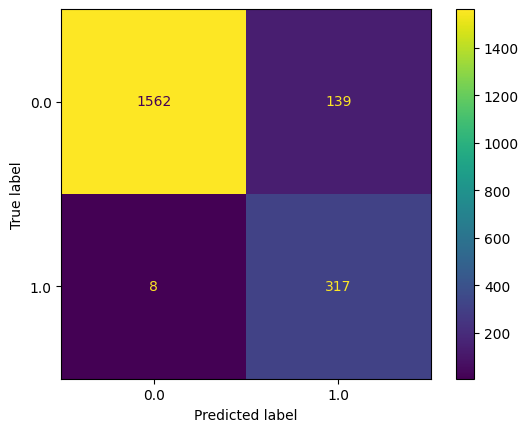

In [103]:
# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_under, y_train_under)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Testing Performance XGBoost Atfer Hyperparameter tuning undersampled data:" "\n")
scores = recall_score(y_test, best_model.predict(X_test))
print("{}: {}".format("XGBoost", scores))
print(model_performance_classification_sklearn(model, X_test, y_test))

print(f"Confusion matrix for training: {confusion_matrix(y_train_under,best_model.predict(X_train_under))}")
ConfusionMatrixDisplay.from_predictions(y_train_under,best_model.predict(X_train_under))

print(f"Confusion matrix for testing: {confusion_matrix(y_test,best_model.predict(X_test))}")
ConfusionMatrixDisplay.from_predictions(y_test,best_model.predict(X_test))


### Display the important features

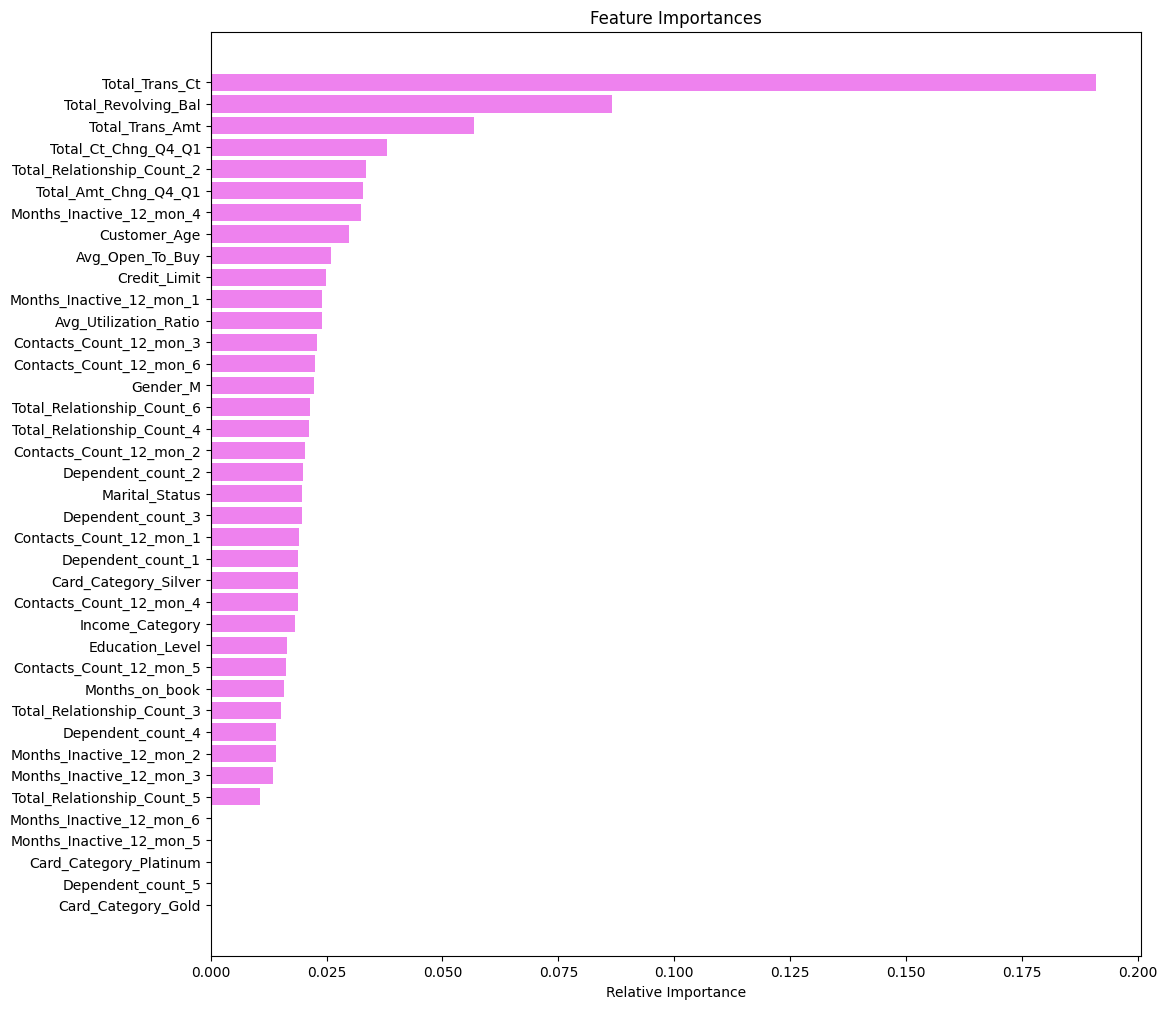

In [107]:
feature_names = X_train.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

-  XGBoost model tuned with undersampled data using Randomized search achieved the highest testing performance on recall of 0.98
- Feature importances graph shows that Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Total_Relationship_Count are the top five important features.
- Confusion matrix also shows that there are lesser number of false negatives on both train and test datasets


# Business Insights and Conclusions

***

Based on the analysis:

1) Customers who own multiple products with the bank are less likely to churn. To keep them, the bank should offer more products to engage them further and further reduce their chances to attrite.

2) Customers inactive for a month are more likely to leave. The bank should focus on these customers and find ways to get them involved again.

3) Low transaction numbers, small revolving balances, and small transactions on a credit card suggest a customer might churn. The bank should offer rewards, cashback, or incentives to encourage more credit card use.

4) Customers aged 36 to 55, with advanced degrees, or women tend to leave more often. This might be because other banks offer them better deals.

5) Customers with many contacts with the bank in the past year are more likely to leave. The bank should check if there were unresolved issues or problems that made these customers unhappy and led them to churn.

6) Customers who leave usually have a lower average utilization ratio, meaning they don't use their credit card much.